# NST Preprocessing Experiment (NPE):
## LDA model from lemmatized dataset

Generating a Latent Dirichlet Allocation (LDA) model from the lemmatized dataset.

In [1]:
# Imports
import os
import random
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from pprint import pprint

from src.utils.file_management import (
    ROOT_PATH,
    load_subtitles,
    write_topics_file)

from src.utils.tables_and_plots import (
    display_n_wordclouds,
    create_wordcloud
)

NST_SAMPLE_SIZE = 1000
NUM_TOPICS = 8
PIPELINE = "lemmatized"

In [2]:
# Load preprocessed CSV file
folder_path_data = r"nst_preprocessing_experiment/preprocessed_data"
file_name_data = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}"

subtitled_programs = load_subtitles(folder_path_data, file_name_data)

In [3]:
example_program_id = random.choice(list(subtitled_programs.keys()))
example_program_slice = 5
subtitled_programs[example_program_id][:example_program_slice]

['høyreside', 'be', 'sveriges', 'statsminister', 'plan']

In [4]:
# Create corpora
texts = subtitled_programs.values()

# Create dictionaries of the words from the subtitles
id2word = corpora.Dictionary(texts)

# Construct the TDFs (Term Document Frequencies) for each text
corpus = {}
for (program_id, subtitle) in subtitled_programs.items():
    corpus[program_id] = id2word.doc2bow(subtitle)

In [5]:
# Creating/loading model from dataset

folder_path_model = r"nst_preprocessing_experiment/models/lda"
file_name_model = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}_lda_{NUM_TOPICS}_topics"
file_path = os.path.join(ROOT_PATH, folder_path_model, PIPELINE, file_name_model)

lda = None

if os.path.exists(file_path):
    lda = LdaMulticore.load(file_path)
else:
    lda = LdaMulticore(corpus=list(corpus.values()), id2word=id2word, num_topics=NUM_TOPICS)
    LdaMulticore.save(lda, file_path)

In [6]:
# Print top 5 topics with keywords
pprint(lda.print_topics(5))

[(1,
  '0.005*"stå" + 0.004*"vite" + 0.004*"tro" + 0.004*"takk" + 0.003*"folk" + '
  '0.003*"norge" + 0.003*"tenke" + 0.003*"mene" + 0.003*"møte" + '
  '0.003*"sitte"'),
 (3,
  '0.004*"tro" + 0.003*"vite" + 0.003*"folk" + 0.003*"stå" + 0.003*"norge" + '
  '0.003*"land" + 0.003*"snakke" + 0.003*"møte" + 0.003*"tenke" + '
  '0.003*"sitte"'),
 (6,
  '0.004*"folk" + 0.004*"stå" + 0.004*"tenke" + 0.003*"vite" + 0.003*"norge" + '
  '0.003*"møte" + 0.003*"tro" + 0.003*"barn" + 0.003*"hel" + 0.002*"liv"'),
 (7,
  '0.004*"folk" + 0.004*"vite" + 0.004*"stå" + 0.003*"tro" + 0.003*"norge" + '
  '0.003*"mene" + 0.003*"lage" + 0.003*"tenke" + 0.002*"snakke" + 0.002*"hel"'),
 (4,
  '0.004*"vite" + 0.004*"stå" + 0.004*"folk" + 0.004*"tro" + 0.004*"tenke" + '
  '0.003*"takk" + 0.003*"barn" + 0.003*"sitte" + 0.003*"hel" + 0.003*"prøve"')]


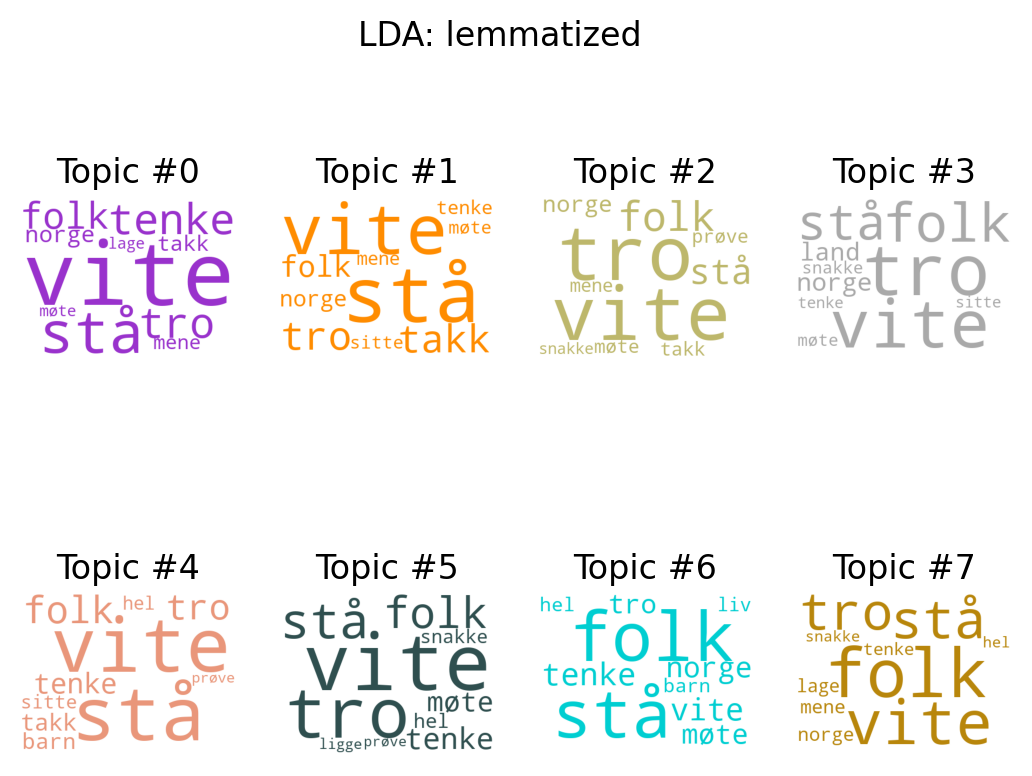

In [7]:
display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], "LDA: " + PIPELINE, NUM_TOPICS, dpi=200)

In [9]:
folder_path_word_cloud = f"nst_preprocessing_experiment/results/word_clouds/lda/{PIPELINE}"

for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [10]:
# Save topic words of model to file

topics = lda.show_topics(num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))

folder_path_topics = r"nst_preprocessing_experiment/results/topics/"
file_name_topics = file_name_data

write_topics_file(folder_path_topics, file_name_topics, topic_words, model="lda", num_lda_topics=NUM_TOPICS)